In [484]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pylab as p1
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import  StandardScaler
from sklearn.metrics import silhouette_score

In [485]:
data=pd.read_csv("C:\\Users\\kaust\\Desktop\\Credit card segmentation case study\\CC GENERAL.csv")

In [486]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [487]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [488]:
data["CREDIT_LIMIT"].fillna(data["CREDIT_LIMIT"].mean(),inplace=True)
data["MINIMUM_PAYMENTS"].fillna(data["MINIMUM_PAYMENTS"].mean(),inplace=True)
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [489]:
## Advanced Data Preparation(Deriving Intelligent KPI's) :--

In [490]:
# Monthly Average purchase and Cash advance amount-- 

In [491]:
data["Monthly_avg_purchase"]=data["PURCHASES"]/data["TENURE"]

In [492]:
data["Monthly_cash_advance"]=data["CASH_ADVANCE"]/data["TENURE"]

In [493]:
# Purchases by Type(Installment, Oneoff)--

In [494]:
data["Purchase_type"]=np.where((data["INSTALLMENTS_PURCHASES"]>0) & (data["ONEOFF_PURCHASES"]==0),"Installment",
                               np.where((data["INSTALLMENTS_PURCHASES"]==0) & (data["ONEOFF_PURCHASES"]>0),"Oneoff",
                               np.where((data["INSTALLMENTS_PURCHASES"]>0) & (data["ONEOFF_PURCHASES"]>0),"Both Oneoff and Installment"
                                        ,"None")))

In [495]:
# Limit usage(Balance to credit limit ratio)--

In [496]:
data["Balance_to_creditlimit"]=data["BALANCE"]/data["CREDIT_LIMIT"]

In [497]:
# Payment to Minimum payment ratio--

In [498]:
data["Pay_to_minpay"]=data["PAYMENTS"]/data["MINIMUM_PAYMENTS"]

In [499]:
## Advanced Reporting(Gaining insights via KPI):--

In [500]:
data["Monthly_avg_purchase"].head()

0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: Monthly_avg_purchase, dtype: float64

In [501]:
data["Monthly_cash_advance"].head()

0      0.000000
1    536.912124
2      0.000000
3     17.149001
4      0.000000
Name: Monthly_cash_advance, dtype: float64

In [502]:
data["Purchase_type"].head()                             

0    Installment
1           None
2         Oneoff
3         Oneoff
4         Oneoff
Name: Purchase_type, dtype: object

In [503]:
data["Balance_to_creditlimit"].head()

0    0.040901
1    0.457495
2    0.332687
3    0.222223
4    0.681429
Name: Balance_to_creditlimit, dtype: float64

In [504]:
data["Pay_to_minpay"].head()

0    1.446508
1    3.826241
2    0.991682
3    0.000000
4    2.771075
Name: Pay_to_minpay, dtype: float64

In [505]:
x=data[["Monthly_avg_purchase","Monthly_cash_advance","Balance_to_creditlimit","Pay_to_minpay","Purchase_type"]]

In [506]:
x.describe()

,Monthly_avg_purchase,Monthly_cash_advance,Balance_to_creditlimit,Pay_to_minpay
count,8950.000000,8950.000000,8950.000000,8950.000000
mean,86.175173,88.977984,0.388883,9.036121
std,180.508787,193.136115,0.389722,118.176913
min,0.000000,0.000000,0.000000,0.000000
25%,3.399375,0.000000,0.041494,0.907301
50%,31.936667,0.000000,0.302720,2.017230
75%,97.228333,99.085196,0.717571,6.049228
max,4086.630833,3928.100980,15.909951,6840.528861


In [507]:
order=["None","Both Oneoff and Installment","Installment","Oneoff"]
c=pd.DataFrame(data["Purchase_type"].value_counts())
c=c.reindex(order)

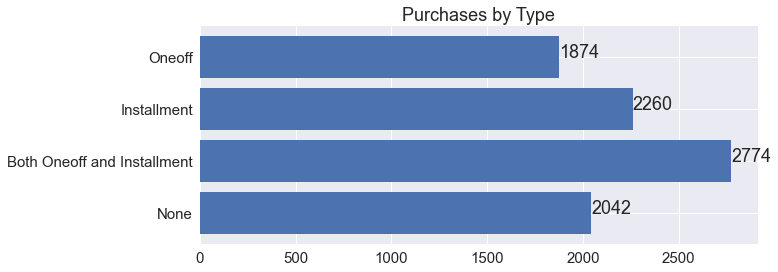

In [508]:
plt.figure(figsize=(10,4))
plt.barh(c.index,c["Purchase_type"])
plt.title("Purchases by Type")
for i,v in enumerate(c["Purchase_type"]):
    plt.text(v,i,str(v))

In [509]:
# The total purchases that the customers did by type are given as follows--
# Oneoff - 1874
# Installment - 2260
# Both Oneoff and Installment - 2774
# None - 2042

In [510]:
x[["Monthly_avg_purchase","Monthly_cash_advance","Balance_to_creditlimit"]].groupby(x["Purchase_type"]).mean()

,Monthly_avg_purchase,Monthly_cash_advance,Balance_to_creditlimit
Purchase_type,,,
Both Oneoff and Installment,192.685172,67.821985,0.353548
Installment,46.974347,38.398206,0.271678
None,0.000000,182.858169,0.573770
Oneoff,69.688958,78.995966,0.381074


In [511]:
## Customers who did both Oneoff and Installment purchases have higher monthly average purchase than the others.

## Customers who neither did Oneoff and Installment purchases take more monthly cash advance

## Customers with Installment purchases have the least limit usage (Balance to credit limit). Lesser the limit usage, higher the
## credit score. Hence customers with Installment purchases have the highest credit score

In [512]:
## Identification of relationships between services:--

In [513]:
data_new=pd.concat([data,pd.get_dummies(data['Purchase_type'])],axis=1)

In [514]:
# Correlation Matrix--

In [515]:
data_new.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,Balance_to_creditlimit,Pay_to_minpay,Both Oneoff and Installment,Installment,None,Oneoff
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,...,-0.318959,0.072692,0.179711,0.475431,0.503557,-0.039302,0.077758,-0.200831,0.152361,-0.031082
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,...,-0.095082,0.119776,0.131281,0.086020,0.404662,-0.088628,0.193949,-0.134502,0.011738,-0.088938
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,...,0.180379,0.086288,0.995845,-0.055473,-0.057408,0.016721,0.396686,-0.126853,-0.255291,-0.052136
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,...,0.132763,0.064150,0.913060,-0.034545,-0.042212,0.010249,0.317956,-0.207457,-0.194062,0.060271
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,...,0.182569,0.086143,0.677024,-0.067782,-0.058264,0.020694,0.353505,0.081506,-0.247149,-0.233936
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,...,-0.152935,-0.068312,-0.047502,0.976364,0.215199,-0.003291,-0.068598,-0.154909,0.261753,-0.026587
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,...,0.305802,0.061506,0.395337,-0.215786,-0.201781,0.011536,0.515593,0.295918,-0.664037,-0.217147
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,...,0.157531,0.082466,0.499711,-0.089034,-0.092006,-0.004466,0.525795,-0.394452,-0.368981,0.204113
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,...,0.250087,0.073275,0.314136,-0.179333,-0.161419,0.018024,0.463390,0.430024,-0.498338,-0.471909
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,...,-0.249773,-0.133372,-0.116109,0.628312,0.360131,-0.021741,-0.094894,-0.237116,0.373717,-0.024397


In [516]:
# Heatmap--

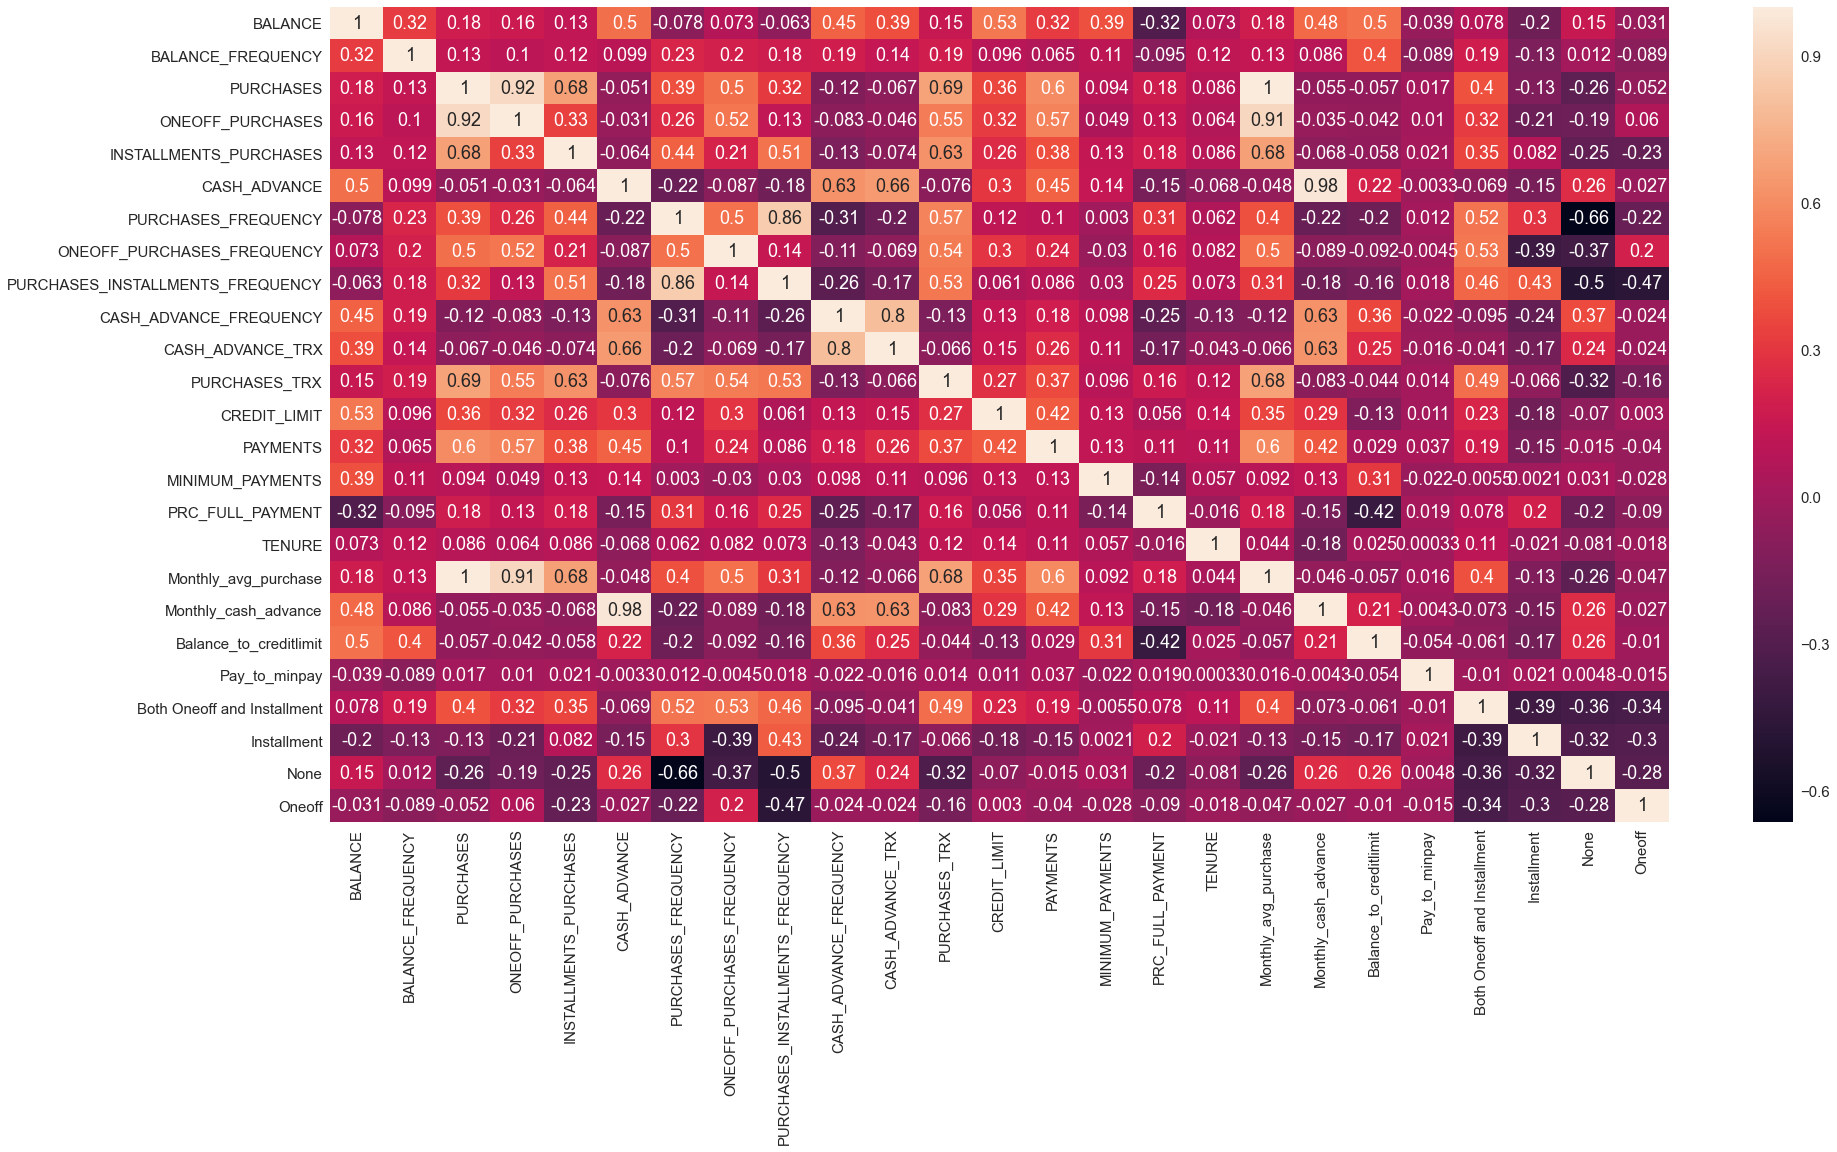

In [517]:
plt.figure(figsize = (30, 15))
sns.heatmap(data_new.corr(),annot=True,annot_kws={"size":18})
plt.show()

In [518]:
## Clustering :--

In [519]:
data_new.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE',
       'Monthly_avg_purchase', 'Monthly_cash_advance', 'Purchase_type',
       'Balance_to_creditlimit', 'Pay_to_minpay',
       'Both Oneoff and Installment', 'Installment', 'None', 'Oneoff'],
      dtype='object')

In [520]:
data_num=data_new[['CUST_ID','BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE',
       'Monthly_avg_purchase', 'Monthly_cash_advance',
       'Balance_to_creditlimit', 'Pay_to_minpay',
       'Both Oneoff and Installment', 'Installment', 'None', 'Oneoff']]

In [521]:
data_num=data_num.set_index(["CUST_ID"])

In [522]:
# Principal Component Analysis--

In [523]:
sc=StandardScaler()

In [524]:
cr_scale=sc.fit_transform(data_num)

In [525]:
var_ratio={}

In [526]:
pca=PCA(n_components=10)

In [527]:
cr_pca=pca.fit(cr_scale)

In [528]:
pca_final=cr_pca.fit_transform(cr_scale)

In [529]:
var_ratio[""]=sum(cr_pca.explained_variance_ratio_)

In [530]:
var_ratio

{'': 0.8443400973530277}

In [531]:
## Here 10 components of the data have 84% of variance

In [532]:
pd.DataFrame(pca.components_.T, columns=['C_' +str(i) for i in range(10)],index=data_num.columns)

,C_0,C_1,C_2,C_3,C_4,C_5,C_6,C_7,C_8,C_9
BALANCE,0.035731,0.350697,-0.093043,0.200743,0.089470,0.217590,0.145311,0.011949,0.186580,0.116916
BALANCE_FREQUENCY,0.079149,0.138644,-0.153096,0.414343,-0.108177,-0.036816,-0.119750,-0.102730,-0.386009,0.472312
PURCHASES,0.354392,0.106657,0.156799,-0.065841,0.232453,-0.047565,-0.123569,-0.012153,-0.067551,-0.054964
ONEOFF_PURCHASES,0.298871,0.117494,0.279483,-0.062238,0.169768,-0.033693,-0.149113,-0.018548,-0.111287,-0.010753
INSTALLMENTS_PURCHASES,0.288795,0.036248,-0.142701,-0.041434,0.237811,-0.050443,-0.018317,0.005303,0.044573,-0.110274
CASH_ADVANCE,-0.073900,0.377903,-0.146517,-0.245831,-0.147487,0.081810,0.025916,-0.013959,-0.018984,-0.054228
PURCHASES_FREQUENCY,0.298406,-0.125823,-0.282236,0.049965,-0.256825,0.124121,-0.092957,0.053964,-0.023616,0.036499
ONEOFF_PURCHASES_FREQUENCY,0.260524,0.043803,0.242693,0.129678,-0.384837,0.012674,-0.030866,0.046812,0.017053,0.131937
PURCHASES_INSTALLMENTS_FREQUENCY,0.255113,-0.124187,-0.447266,0.012136,-0.068279,-0.000102,-0.025295,0.035580,0.005057,-0.080273
CASH_ADVANCE_FREQUENCY,-0.122336,0.349166,-0.108572,-0.041024,-0.138820,-0.101179,-0.160955,0.026619,-0.144719,-0.058277


In [533]:
pd.Series(cr_pca.explained_variance_ratio_,index=['Factor_C_'+ str(i) for i in range(10)])

Factor_C_0    0.242369
Factor_C_1    0.183822
Factor_C_2    0.087001
Factor_C_3    0.071781
Factor_C_4    0.058759
Factor_C_5    0.050591
Factor_C_6    0.043926
Factor_C_7    0.039702
Factor_C_8    0.035784
Factor_C_9    0.030604
dtype: float64

In [534]:
# Here the above scores tells about the variance exhibited by each component.

In [535]:
# KMeans Clustering--

In [536]:
# With 5 clusters - 

In [537]:
km5=KMeans(n_clusters=5)

In [538]:
km5.fit(pca_final)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [539]:
pd.Series(km5.labels_).value_counts()

1    3235
2    2484
0    2138
3     918
4     175
dtype: int64

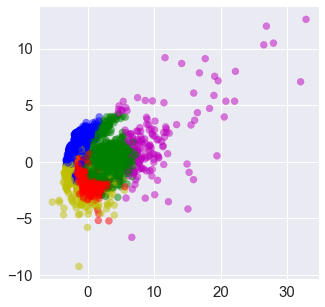

In [540]:
color={0:'r',1:'b',2:'g',3:'y',4:'m'}
label=[color[i] for i in km5.labels_]
plt.figure(figsize=(5,5))
plt.scatter(pca_final[:,0],pca_final[:,2],c=label,alpha=0.5)

In [541]:
# With 6 clusters - 

In [542]:
km6=KMeans(n_clusters=6)

In [543]:
km6.fit(pca_final)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [544]:
pd.Series(km6.labels_).value_counts()

4    2383
1    2158
0    1843
2    1713
5     670
3     183
dtype: int64

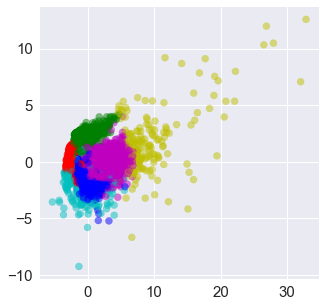

In [545]:
color={0:'r',1:'b',2:'g',3:'y',4:'m',5:'c'}
label=[color[i] for i in km6.labels_]
plt.figure(figsize=(5,5))
plt.scatter(pca_final[:,0],pca_final[:,2],c=label,alpha=0.5)

In [546]:
# With 7 clusters -

In [547]:
km7=KMeans(n_clusters=7)

In [548]:
km7.fit(pca_final)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [549]:
pd.Series(km7.labels_).value_counts()

3    2143
2    2044
1    1819
4    1688
0     661
5     565
6      30
dtype: int64

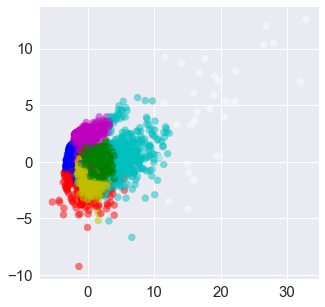

In [550]:
color={0:'r',1:'b',2:'g',3:'y',4:'m',5:'c',6:'w'}
label=[color[i] for i in km7.labels_]
plt.figure(figsize=(5,5))
plt.scatter(pca_final[:,0],pca_final[:,2],c=label,alpha=0.5)

In [551]:
## Generating insights for each cluster and Identifying their characteristics via Profiling :--

In [552]:
# Silhouette score--

In [553]:
score_5={}

In [554]:
score_5["Silhouette_Coeff_Cluster5"]=silhouette_score(pca_final,km5.labels_)

In [555]:
score_5

{'Silhouette_Coeff_Cluster5': 0.25233610789407795}

In [556]:
score_6={}

In [557]:
score_6["Silhouette_Coeff_Cluster6"]=silhouette_score(pca_final,km6.labels_)

In [558]:
score_6

{'Silhouette_Coeff_Cluster6': 0.29624116619777946}

In [559]:
score_7={}

In [560]:
score_7["Silhouette_Coeff_Cluster7"]=silhouette_score(pca_final,km7.labels_)

In [561]:
score_7

{'Silhouette_Coeff_Cluster7': 0.2914726818352965}

In [562]:
# Here Silhouette coefficients of each clusters are given as follows - 
# Cluster 5 - 0.252
# Cluster 6 - 0.296
# Cluster 7 - 0.291

# Here Kmeans clustering with 6 clusters have a higher score than others. 

In [563]:
# Profiling --

In [564]:
data_num.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Monthly_avg_purchase', 'Monthly_cash_advance',
       'Balance_to_creditlimit', 'Pay_to_minpay',
       'Both Oneoff and Installment', 'Installment', 'None', 'Oneoff'],
      dtype='object')

In [565]:
data_num["Cluster5"]=km5.labels_

In [566]:
data_num["Cluster6"]=km6.labels_

In [567]:
data_num["Cluster7"]=km7.labels_

In [568]:
c5_mean=data_num.groupby(["Cluster5"])['Monthly_avg_purchase', 'Monthly_cash_advance','Both Oneoff and Installment', 
                               'Installment', 'None', 'Oneoff','CASH_ADVANCE_TRX', 'PURCHASES_TRX',
                               'Balance_to_creditlimit', 'Pay_to_minpay'].mean()
c5_mean.T

C:\Users\kaust\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Cluster5,0,1,2,3,4
Monthly_avg_purchase,44.485046,23.549811,157.063896,43.656921,970.007774
Monthly_cash_advance,16.634739,69.312359,28.219594,494.460518,71.715282
Both Oneoff and Installment,0.006548,0.042040,0.915459,0.214597,0.874286
Installment,0.993452,0.009892,0.001610,0.101307,0.040000
None,0.000000,0.491499,0.000000,0.492375,0.000000
Oneoff,0.000000,0.456569,0.082931,0.191721,0.085714
CASH_ADVANCE_TRX,0.601029,2.989799,1.360709,15.605664,2.365714
PURCHASES_TRX,11.685688,2.359815,29.509662,7.160131,109.485714
Balance_to_creditlimit,0.244574,0.473353,0.312299,0.634063,0.391376
Pay_to_minpay,13.787707,7.649116,7.268270,5.895781,18.191800


In [569]:
data_num["Cluster5"].value_counts()*100/sum(data_num["Cluster5"].value_counts())

1    36.145251
2    27.754190
0    23.888268
3    10.256983
4     1.955307
Name: Cluster5, dtype: float64

In [571]:
# With 5 clusters, we can draw the following points -
# > Group 1 is in higher percentage than others
# > Group 4 has highest monthly average purchase 
# > Group 3 has highest cash advance
# > Group 0 has the least limit usage highlighting highest credit score

In [572]:
c6_mean=data_num.groupby(["Cluster6"])['Monthly_avg_purchase', 'Monthly_cash_advance','Both Oneoff and Installment', 
                               'Installment', 'None', 'Oneoff','CASH_ADVANCE_TRX', 'PURCHASES_TRX',
                               'Balance_to_creditlimit', 'Pay_to_minpay'].mean()
c6_mean.T

C:\Users\kaust\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Cluster6,0,1,2,3,4,5
Monthly_avg_purchase,0.455997,44.200347,61.398256,951.098045,150.026222,57.170751
Monthly_cash_advance,123.254918,17.838085,39.004729,68.580187,30.868835,563.841558
Both Oneoff and Installment,0.014107,0.006024,0.007005,0.868852,0.997063,0.280597
Installment,0.013022,0.993976,0.000000,0.038251,0.001679,0.119403
None,0.972870,0.000000,0.000000,0.000000,0.000000,0.371642
Oneoff,0.000000,0.000000,0.992995,0.092896,0.001259,0.228358
CASH_ADVANCE_TRX,4.846989,0.641798,1.737887,2.262295,1.494755,17.620896
PURCHASES_TRX,0.093869,11.601483,6.545826,109.191257,28.933277,9.404478
Balance_to_creditlimit,0.565579,0.248762,0.356409,0.389561,0.330276,0.645448
Pay_to_minpay,9.756481,13.682438,5.457079,18.064246,6.816304,6.669252


In [480]:
data_num["Cluster6"].value_counts()*100/sum(data_num["Cluster6"].value_counts())

0    26.670391
4    24.089385
2    20.581006
5    19.128492
3     7.486034
1     2.044693
Name: Cluster6, dtype: float64

In [573]:
# With 6 clusters, we can draw the following points -
# > Group 0 is in higher percentage than others
# > Group 3 has higher monthly average purchase than others, and most of it is done with both Oneoff and Installment 
#   purchases
# > Group 5 has more cash advance than others
# > Group 1 has the least limit usage highlighting highest credit score

In [574]:
c7_mean=data_num.groupby(["Cluster7"])['Monthly_avg_purchase', 'Monthly_cash_advance','Both Oneoff and Installment', 
                               'Installment', 'None', 'Oneoff','CASH_ADVANCE_TRX', 'PURCHASES_TRX',
                               'Balance_to_creditlimit', 'Pay_to_minpay'].mean()
c7_mean.T

C:\Users\kaust\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Cluster7,0,1,2,3,4,5,6
Monthly_avg_purchase,53.818128,0.126520,108.933665,43.541733,57.930606,458.174982,2094.593383
Monthly_cash_advance,566.865793,123.789632,30.020804,18.143368,39.503259,44.086642,154.903717
Both Oneoff and Installment,0.272315,0.002199,1.000000,0.000000,0.000000,0.922124,0.833333
Installment,0.121029,0.012095,0.000000,1.000000,0.000000,0.023009,0.066667
None,0.376702,0.985706,0.000000,0.000000,0.000000,0.000000,0.000000
Oneoff,0.229955,0.000000,0.000000,0.000000,1.000000,0.054867,0.100000
CASH_ADVANCE_TRX,17.596067,4.833425,1.577299,0.651890,1.764810,1.670796,3.666667
PURCHASES_TRX,9.096823,0.034634,21.970157,11.560429,6.358412,72.076106,148.000000
Balance_to_creditlimit,0.646161,0.563229,0.330486,0.250100,0.359034,0.353288,0.391508
Pay_to_minpay,6.637071,9.861338,5.849692,13.726796,5.396907,12.935525,25.218608


In [575]:
data_num["Cluster7"].value_counts()*100/sum(data_num["Cluster7"].value_counts())

3    23.944134
2    22.837989
1    20.324022
4    18.860335
0     7.385475
5     6.312849
6     0.335196
Name: Cluster7, dtype: float64

In [ ]:
# With 7 clusters, we can draw the following points -
# > Group 3 is in higher percentage than others
# > Group 6 has higher monthly average purchase than others
# > Group 0 has more cash advance than others
# > Group 3 has the least limit usage highlighting highest credit score

In [483]:
data_num[['Monthly_avg_purchase', 'Monthly_cash_advance','Both Oneoff and Installment','Installment', 'None', 'Oneoff',
          'CASH_ADVANCE_TRX','PURCHASES_TRX','Balance_to_creditlimit', 'Pay_to_minpay',"Cluster5","Cluster6","Cluster7"]].describe()

,Monthly_avg_purchase,Monthly_cash_advance,Both Oneoff and Installment,Installment,None,Oneoff,CASH_ADVANCE_TRX,PURCHASES_TRX,Balance_to_creditlimit,Pay_to_minpay,Cluster5,Cluster6,Cluster7
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,86.175173,88.977984,0.309944,0.252514,0.228156,0.209385,3.248827,14.709832,0.388883,9.036121,1.839888,2.576648,2.904469
std,180.508787,193.136115,0.462496,0.434479,0.419667,0.406893,6.824647,24.857649,0.389722,118.176913,1.579833,1.874869,2.137609
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.399375,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.041494,0.907301,0.000000,0.000000,1.000000
50%,31.936667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.302720,2.017230,2.000000,3.000000,2.000000
75%,97.228333,99.085196,1.000000,1.000000,0.000000,0.000000,4.000000,17.000000,0.717571,6.049228,3.000000,4.000000,4.000000
max,4086.630833,3928.100980,1.000000,1.000000,1.000000,1.000000,123.000000,358.000000,15.909951,6840.528861,4.000000,5.000000,6.000000


In [ ]:
# Here 6 clusters have higher silhouette score than others, hence for the implementation of the strategies we go with the 
# Kmeans clustering with 6 clusters.

In [ ]:
## SUGGESTIONS FOR IMPROVEMENT:--


# Group 0 makes least purchases with the poor credit score. Hence, we can vouch for improvement by providing less interest rate
# on purchase transactions

# Group 1 has the best credit score and has the least cash advance. Hence, this group has performed better than others

# Group 2 has the minimum paying ratio and goes mainly for oneoff transactions. Hence, it is a risky group.

# Group 3 has made highest average purchases along with keeping the highest payment ratio. Giving the customers reward points 
# would help in making more purchases

# Group 4 has maintained a good credit score, cash advance and purchases. One can increase the credit limit to improve the scores

# Group 5 has highest cash advance with the least credit score. Putting less interest rate on purchases can improve the scores.
